# Converting Handwritten Math Symbols Into $\LaTeX$

## Introduction

LaTeX is a typesetting language that renders mathematical equations from its syntax. The goal of this project is to create **a program that generates LaTeX syntax from a simple picture taken on a smartphone**.

The process of converting images of words and symbols into a digital format is called optical character recognition, or OCR. While there are many OCR implementations, both commercial and open-source, the field is still an active research area. This is because text, both handwritten or printed, can have many variations that makes it difficult for a machine to understand. As you will see, the implementation is by no means complete. However, with the limited time and knowledge, we've created a limited program that, given specific conditions such good lighting, clean background, etc., will correctly convert an image of an equation into LaTeX.

## Data Processing

In [1]:
import numpy as np
import sys
from os import listdir
from matplotlib import pyplot as plt
from random import shuffle
import matplotlib.image as mpimg
import cv2
import csv

#### Convert images to CSVs and split into training and validation sets

In [2]:
def process_image(img, close_kernel=None, dilate_kernel=None):
    """
    Processes an image by converting it to black and white and applying dilation.
    
    :param img: image to process
    :param close_kernel: a closing morphological transformation kernel 
    :param dilate_kernel: a dilating morphological transformation kernel
    :return: the binary processed image
    """
    if close_kernel is None: close_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
    if dilate_kernel is None: dilate_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    new_img = img < 127
    new_img = new_img.astype(np.uint8)
    new_img = cv2.morphologyEx(new_img, cv2.MORPH_CLOSE, close_kernel)
    new_img = cv2.dilate(new_img, dilate_kernel)
    return new_img

def process_data(names, latex_key, img_path, save_path, close_kernel=None, dilate_kernel=None, tr_cv_split=80):
    """
    Processes the dataset of handwritten symbol images.

    :param names: the filenames of the images
    :param latex_key: dictionary mapping symbol to latex representation
    :param img_path: the directory of where the images are located
    :param save_path: the directory to save the processed images
    :param close_kernel: a closing morphological transformation kernel 
    :param dilate_kernel: a dilating morphological transformation kernel
    :param tr_cv_split: the percent to keep in the training set vs the test set
    """
    if close_kernel is None: close_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
    if dilate_kernel is None: dilate_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    key = {}
    for k, name in enumerate(names):
        sys.stdout.write(name + '\n')
        # Create key
        if name in latex_key:
            key[k] = latex_key[name]
        else:
            key[k] = name.lower()
    
        # Get files of images
        imgs = []
        img_files = listdir(img_path + name + '\\')
        shuffle(img_files)
        
        for i, img_file in enumerate(img_files):  
            img = mpimg.imread(img_path + name + '\\' + img_file)
            
            # Convert to binary and close + dilate
            img = process_image(img, close_kernel, dilate_kernel)

            # Add label
            imgs.append(np.append(img.ravel(), k))

            # Print progress
            sys.stdout.write('\r')
            sys.stdout.write('{:.2%}'.format(i/len(img_files)))
            sys.stdout.flush()
        sys.stdout.write('\r100.00%\n')

        # Split into training set and validation set and save
        arr = np.asarray(imgs)
        ind = len(img_files) * tr_cv_split // 100
        np.savetxt(save_path + 'tr\\' + name +'_tr' +'.csv', arr[:ind], delimiter=',', fmt='%i')
        np.savetxt(save_path + 'cv\\' + name +'_cv' +'.csv', arr[ind:], delimiter=',', fmt='%i')
    
    # Save key
    if save_path:
        with open(save_path + 'dict.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for k, v in key.items():
                writer.writerow([k, v]) 
    return key

In [3]:
latex_key = {'(': '\\left(',
             ')': '\\right)',
             'alpha': '\\alpha',
             'ascii_124': '|',
             'beta': '\\beta',
             'cos': '\\cos',
             'Delta': '\\Delta',
             'div': '\\div',
             'exists': '\\exists',
             'forall': '\\forall',
             'forward_slash': '\\',
             'gamma': '\\gamma',
             'geq': '\\geq',
             'gt': '>',
             'infty': '\\infty',
             'int': '\\int',
             'in': '\\in',
             'lambda': '\\lambda',
             'ldots': '\\ldots',
             'leq': '\\leq',
             'lim': '\\lim',
             'log': '\\log',
             'lt': '<',
             'mu': '\\mu',
             'neq': '\\neq',
             'phi': '\\phi',
             'pi': '\\pi',
             'pm': '\\pm',
             'prime': '\'',
             'rightarrow': '\\rightarrow',
             'sigma': '\\sigma',
             'sin': '\\sin',
             'sqrt': '\\sqrt',
             'sum': '\\sum',
             'tan': '\\tan',
             'theta': '\\theta',
             'times': '\\times',
             '[': '\\left[',
             ']': '\\right]',
             '{': '\\left{',
             '}': '\\right}'}

# Convert images to csv
img_path = 'F:\\Users\\Alvin\\Downloads\\data.rar\\data\\extracted_images\\'
img_names = listdir(img_path)
save_path = 'F:\\Users\\Alvin\\Downloads\\data.rar\\data\\csv\\'
key = process_data(img_names, latex_key, img_path, save_path)

(
100.00%
)
100.00%
+
100.00%
,
100.00%
-
100.00%
0
100.00%
1
100.00%
2
100.00%
3
100.00%
4
100.00%
5
100.00%
6
100.00%
7
100.00%
8
100.00%
9
100.00%
A
100.00%
alpha
100.00%
b
100.00%
beta
100.00%
C
100.00%
d
100.00%
Delta
100.00%
e
100.00%
exists
100.00%
f
100.00%
forall
100.00%
forward_slash
100.00%
G
100.00%
gamma
100.00%
gt
100.00%
H
100.00%
i
100.00%
in
100.00%
infty
100.00%
int
100.00%
j
100.00%
k
100.00%
l
100.00%
lambda
100.00%
lt
100.00%
M
100.00%
mu
100.00%
N
100.00%
neq
100.00%
o
100.00%
p
100.00%
phi
100.00%
pi
100.00%
pm
100.00%
q
100.00%
R
100.00%
rightarrow
100.00%
S
100.00%
sigma
100.00%
sqrt
100.00%
sum
100.00%
T
100.00%
theta
100.00%
u
100.00%
v
100.00%
w
100.00%
X
100.00%
y
100.00%
z
100.00%
[
100.00%
]
100.00%
{
100.00%
}
100.00%


Our raw data downloaded from [Kaggle](https://www.kaggle.com/xainano/handwrittenmathsymbols) looks like the following:

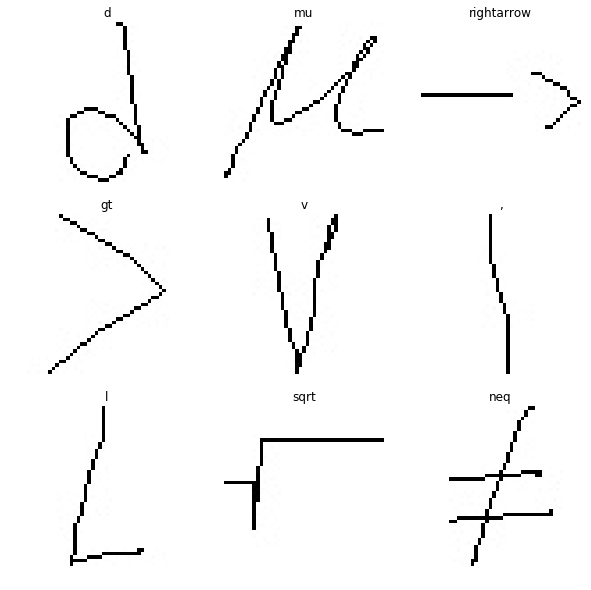

In [4]:
img_path = 'F:\\Users\\Alvin\\Downloads\\data.rar\\data\\extracted_images\\'
img_names = listdir(img_path)
shuffle(img_names)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax, name in zip(axes.ravel(), img_names[:9]):
    img_file = listdir(img_path + name + '\\')[0]
    img = mpimg.imread(img_path + name + '\\' + img_file)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(name)
plt.show()

The dataset was not the highest of quality, so some basic image preprocessing was required. Using the functions above, each image is converted into binary, morphed so that holes/missing pixels were closed, and then dilated. 

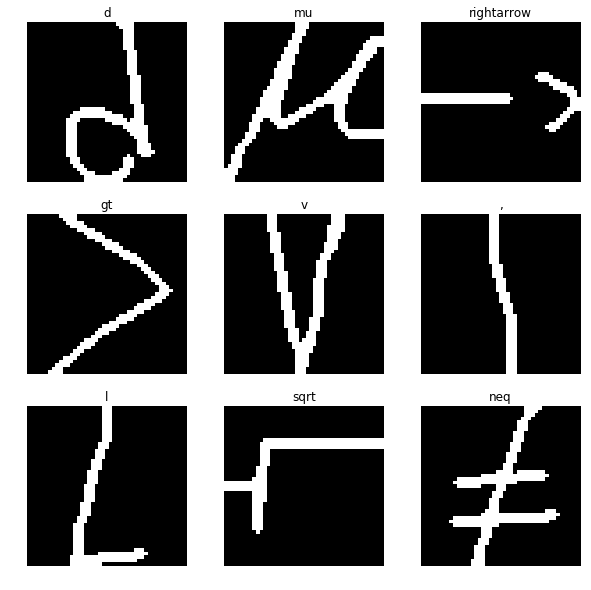

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax, name in zip(axes.ravel(), img_names[:9]):
    img_file = listdir(img_path + name + '\\')[0]
    img = mpimg.imread(img_path + name + '\\' + img_file)
    new_img = process_image(img)
    ax.imshow(new_img, cmap='gray')
    ax.axis('off')
    ax.set_title(name)
plt.show()

#### Combine all files and shuffle

In [6]:
def combine(names, tr_path, cv_path, save_path, shuffle=True):
    """
    Combines all the files together for the training set and test set and shuffles them.
    
    :param names: the names of the files
    :param tr_path: the path of the training datset
    :param cv_path: the path of the test set
    :param save_path: the path to save the combined file at
    :param shuffle: whether to shuffle the dataset or not
    """
    for path, ending in [(tr_path, '_tr.csv'), (cv_path, '_cv.csv')]:
        X = None
        for i, name in enumerate(names):
            # Print progress
            sys.stdout.write('\r')
            sys.stdout.write('{:.2%}'.format(i/len(names)))
            sys.stdout.flush()
            
            curr = np.loadtxt(path + name + ending, delimiter=',')
            if X is None: 
                X = curr.copy()
                continue
            X = np.vstack([X, curr])
        sys.stdout.write('\r100.00%\n')

        # Shuffle
        if shuffle: np.random.shuffle(X)
        np.savetxt(save_path + 'all' + ending, X, delimiter=',', fmt='%i')

In [7]:
img_path = 'F:\\Users\\Alvin\\Downloads\\data.rar\\data\\extracted_images\\'
img_names = listdir(img_path)

save_path = 'F:\\Users\\Alvin\\Downloads\\data.rar\\data\\csv\\'
tr_path = 'F:\\Users\\Alvin\\Downloads\\data.rar\\data\\csv\\tr\\'
cv_path = 'F:\\Users\\Alvin\\Downloads\\data.rar\\data\\csv\\cv\\'

combine(img_names, tr_path, cv_path, save_path)

100.00%
100.00%


## Image Processing

In [8]:
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import cv2

#### Convert to grayscale and filter out noise

An image taken using a camera is bound to have a ton of noise in it. The noise, such as shadows or specks, is lessened by blurring and thresholding. The image is then dilated to make sure it is thick enough. 

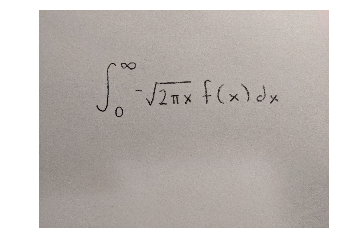

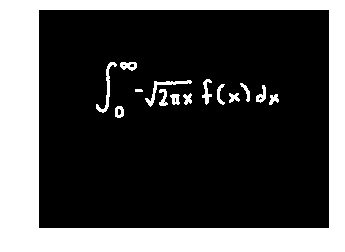

In [9]:
def process_image(X, dilation_kernel=None, dilation_iterations=3):
    """
    Processes an image by converting it to black and white and applying dilation.
    
    :param X: the image to process
    :param dilate_kernel: a dilating morphological transformation kernel
    :param dilation_iterations: how many iterations to dilate the image
    :return: the binary processed image
    """
    # Binary
    X_gray = cv2.cvtColor(cv2.imread(file_name_X).astype(np.uint8), cv2.COLOR_BGR2GRAY)

    # Remove initial noise and smoothen lighting gradient
    X_gray_smooth = cv2.GaussianBlur(X_gray, (11, 11), 0) #
    # Threshold
    X_gray_smooth = cv2.adaptiveThreshold(X_gray_smooth, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Blur
    X_gray_smooth = cv2.blur(X_gray_smooth, (3, 3))
    # Threshold
    X_gray_smooth = cv2.threshold(X_gray_smooth, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Median blur
    X_gray_smooth = cv2.medianBlur(X_gray_smooth, 17)
    # Threshold
    X_bw = 1 - np.round(X_gray_smooth/255)

    # Dilate
    if not dilation_kernel: dilation_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    X_bw =  cv2.dilate(X_bw, dilation_kernel, iterations=dilation_iterations)

    return X_bw.astype(np.uint8)

# Read in image
file_name_X = 'C:\\Users\\Alvin\\Desktop\\int0.jpg'
X = mpimg.imread(file_name_X)[:, :, 0:3].reshape(-1, 3)
new_shape = list(mpimg.imread(file_name_X).shape)
new_shape[2] = 3
X = X.reshape(new_shape)

X_processed = process_image(X)

plt.imshow(X)
plt.axis('off')
plt.show()

plt.imshow(X_processed, cmap='gray')
plt.axis('off')
plt.show()

#### Break into connected components

After the entire image is processed, the image is broken into connected components as shown below:

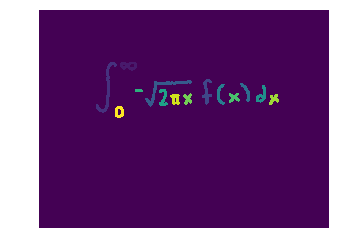

In [10]:
_, labels = cv2.connectedComponents(X_processed)

plt.imshow(labels)
plt.axis('off')
plt.show()

#### Process each component

Since each component has a different size, additional preprocessing is done to make sure it is not too thick since zooming in will cause the image to become larger. To do this, the image is converted into a square image and the eroded until it is a certain percent of its original.

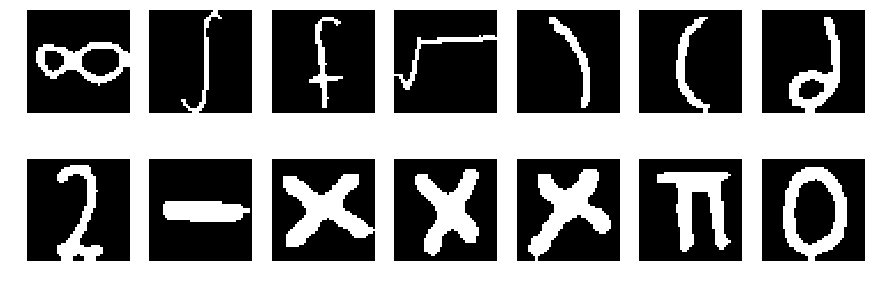

In [11]:
def pad(arr, pad_width):
    """
    Pads the array with zeros in all directions.
    
    :param arr: array to pad
    :param pad_width: how many zeros to add in all directions
    :return: a zero-padded array
    """
    arr_new = np.hstack([np.zeros([arr.shape[0], pad_width]), arr]) #left
    arr_new = np.hstack([arr_new, np.zeros([arr_new.shape[0], pad_width])]) #right
    arr_new = np.vstack([np.zeros([pad_width, arr_new.shape[1]]), arr_new]) #up
    arr_new = np.vstack([arr_new, np.zeros([pad_width, arr_new.shape[1]])]) #down
    return arr_new

def square(arr, pad_width, top, left, bottom, right):
    """
    Crops the image into a square.
    
    :param arr: the image to crop
    :param pad_width: how much the padded width is
    :param top: the topmost array location
    :param left: the leftmost array location
    :param bottom: the bottommost array location
    :param right: the rightmost array location
    :return: the image cropped as a square
    """
    arr_square = arr[top-pad_width:bottom+pad_width, left-pad_width:right+pad_width]
    diff = abs(arr_square.shape[1] - arr_square.shape[0])
    pad = diff // 2
    if arr_square.shape[0] < arr_square.shape[1]:
        arr_square = np.vstack([np.zeros([pad, arr_square.shape[1]]), arr_square]) #up
        arr_square = np.vstack([arr_square, np.zeros([pad + (diff % 2 == 1), arr_square.shape[1]])]) #down
    elif arr_square.shape[0] >= arr_square.shape[1]:
        arr_square = np.hstack([np.zeros([arr_square.shape[0], pad]), arr_square]) #left
        arr_square = np.hstack([arr_square, np.zeros([arr_square.shape[0], pad + (diff % 2 == 1)])]) #right
    return arr_square

def erode(arr, erosion_percent):
    """
    Erodes the array by some percent of the original.
    
    :param arr: the image to erode
    :param erosion_percent: the percent threshold to erode until
    :return: the eroded array
    """
    for dim in range(1, 12):
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dim, dim))
        erosion = cv2.erode(arr, kernel, iterations = 1)
        if np.sum(erosion)/np.sum(arr) < erosion_percent:
            break
    dim -= 1
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dim, dim))
    erosion = cv2.erode(arr, kernel, iterations = 1)
    return erosion

def get_components(labels, pad_width=3, erosion_percent=0.4, show=True):
    """
    :param labels: the labels of the components
    :param pad_width: how many zeros to add in all directions
    :param erosion_percent: the percent threshold to erode until
    :param show: whether to show the components
    :return: a dictionary of components mapping label to a dictionary of attributes
    """
    components = {i:{'label':None, 
                    'output':None, 
                    'tl':None, 
                    'br':None, 
                    'pic':None,
                    'group':None,
                    'sup':False,
                    'sub':False} 
                 for i in range(1, len(np.unique(labels)))}

    fig, axes = plt.subplots(2, int((len(components) + 1)/2), figsize=(15, 5))
    for i, ax in zip(sorted(components.keys()), axes.ravel()):
        label = labels.copy()
        label[labels != i] = 0
        label_padded = pad(label, pad_width)

        # Get dimensions of component
        xs, ys = np.where(label != 0)
        top, bottom, left, right = np.min(xs), np.max(xs), np.min(ys), np.max(ys)
        components[i]['tl'] = (top, left)
        components[i]['br'] = (bottom, right)

        # Square and resize
        label_square = square(label_padded, pad_width, top, left, bottom, right)
        label_square = cv2.resize(label_square, (45, 45))
        label_square[label_square != 0] = 1

        # Erode based on size
        label_eroded = erode(label_square, erosion_percent)
        components[i]['pic'] = label_eroded.ravel()

        if show:
            ax.imshow(label_eroded, cmap='gray')
            ax.axis('off')
    if show: plt.show()
    return components

components = get_components(labels)

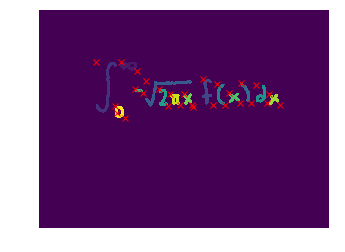

In [12]:
plt.imshow(labels)
for tl, br in [(components[i]['tl'], components[i]['br']) for i in components]:
    plt.plot(*tl[::-1], 'rx')
    plt.plot(*br[::-1], 'rx')
plt.axis('off')
plt.show()

## Model

For the training of the dataset, we decided to use a convolution neural network with a LeNet architecture:
- Input: 45x45
- First convolution: 6 @ (4, 4) 
- First pooling: Max pool (2, 2)
- Second convolution: 12 @ (4, 4)
- Second pooling: Max pool (2, 2)
- First full connection: 972 $\rightarrow$ 240 units
- Second full connection: 240 $\rightarrow$ 120 units
- Output: 120 $\rightarrow$ 68 units

#### Load data

In [13]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

data_tr = np.loadtxt('F:\\Users\\Alvin\\Downloads\\data.rar\\data\\csv\\all_tr.csv', delimiter=',', dtype=int)
data_cv = np.loadtxt('F:\\Users\\Alvin\\Downloads\\data.rar\\data\\csv\\all_cv.csv', delimiter=',', dtype=int)

#### Define network

In [14]:
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 45, 45, 1])

    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=6,
      kernel_size=[4, 4],
      padding="valid",
      activation=tf.nn.relu)

    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=12,
      kernel_size=[4, 4],
      padding="valid",
      activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Dense Layer #1
    pool2_flat = tf.reshape(pool2, [-1, 972])
    dense1 = tf.layers.dense(inputs=pool2_flat, units=240, activation=tf.nn.relu)

    # Dense Layer #2
    pool2_flat = tf.reshape(pool2, [-1, 240])
    dense2 = tf.layers.dense(inputs=dense1, units=120, activation=tf.nn.relu)

    # Logits Layer
    logits = tf.layers.dense(inputs=dense2, units=68)

    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=68)
    loss = tf.losses.softmax_cross_entropy(
      onehot_labels=onehot_labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

#### Train on data

In [10]:
train_data = data_tr[:, :-1].astype(np.float32)
train_labels = data_tr[:, -1].astype(np.int32)

eval_data = data_cv[:, :-1].astype(np.float32)
eval_labels = data_cv[:, -1].astype(np.int32)

#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.logging.set_verbosity(tf.logging.INFO)

classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="C:\\Users\\Alvin\\Google Drive\\School\\NU\\Fall 19\\EECS 395\\Project\\NN3")

# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=250,
    num_epochs=125,
    shuffle=True)
classifier.train(
    input_fn=train_input_fn)#,
    #steps=10000)

# Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)
eval_results = classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Alvin\\Google Drive\\School\\NU\\Fall 19\\EECS 395\\Project\\NN3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C0246D5518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` mod

INFO:tensorflow:global_step/sec: 5.30906
INFO:tensorflow:loss = 0.43669215, step = 5801 (18.837 sec)
INFO:tensorflow:global_step/sec: 5.36743
INFO:tensorflow:loss = 0.2766173, step = 5901 (18.631 sec)
INFO:tensorflow:global_step/sec: 5.39115
INFO:tensorflow:loss = 0.29727006, step = 6001 (18.548 sec)
INFO:tensorflow:global_step/sec: 5.39638
INFO:tensorflow:loss = 0.25205174, step = 6101 (18.531 sec)
INFO:tensorflow:global_step/sec: 5.39463
INFO:tensorflow:loss = 0.3173624, step = 6201 (18.538 sec)
INFO:tensorflow:global_step/sec: 5.41712
INFO:tensorflow:loss = 0.2655329, step = 6301 (18.464 sec)
INFO:tensorflow:global_step/sec: 5.31159
INFO:tensorflow:loss = 0.37854642, step = 6401 (18.822 sec)
INFO:tensorflow:Saving checkpoints for 6415 into C:\Users\Alvin\Google Drive\School\NU\Fall 19\EECS 395\Project\NN3\model.ckpt.
INFO:tensorflow:global_step/sec: 5.20252
INFO:tensorflow:loss = 0.2823736, step = 6501 (19.222 sec)
INFO:tensorflow:global_step/sec: 5.34564
INFO:tensorflow:loss = 0.33

INFO:tensorflow:loss = 0.16295376, step = 13501 (18.972 sec)
INFO:tensorflow:global_step/sec: 5.4022
INFO:tensorflow:loss = 0.12699607, step = 13601 (18.511 sec)
INFO:tensorflow:global_step/sec: 5.38216
INFO:tensorflow:loss = 0.12929378, step = 13701 (18.579 sec)
INFO:tensorflow:global_step/sec: 5.37984
INFO:tensorflow:loss = 0.16585033, step = 13801 (18.588 sec)
INFO:tensorflow:global_step/sec: 5.34507
INFO:tensorflow:loss = 0.13109413, step = 13901 (18.710 sec)
INFO:tensorflow:global_step/sec: 5.28718
INFO:tensorflow:loss = 0.15985559, step = 14001 (18.917 sec)
INFO:tensorflow:global_step/sec: 5.28606
INFO:tensorflow:loss = 0.15878384, step = 14101 (18.915 sec)
INFO:tensorflow:global_step/sec: 5.3706
INFO:tensorflow:loss = 0.097622894, step = 14201 (18.619 sec)
INFO:tensorflow:global_step/sec: 5.38824
INFO:tensorflow:loss = 0.17494653, step = 14301 (18.559 sec)
INFO:tensorflow:global_step/sec: 5.38795
INFO:tensorflow:loss = 0.19166537, step = 14401 (18.560 sec)
INFO:tensorflow:global

INFO:tensorflow:loss = 0.09375668, step = 21301 (18.499 sec)
INFO:tensorflow:global_step/sec: 5.38737
INFO:tensorflow:loss = 0.07848871, step = 21401 (18.562 sec)
INFO:tensorflow:global_step/sec: 5.40133
INFO:tensorflow:loss = 0.12954096, step = 21501 (18.514 sec)
INFO:tensorflow:global_step/sec: 5.36772
INFO:tensorflow:loss = 0.062921174, step = 21601 (18.630 sec)
INFO:tensorflow:global_step/sec: 5.406
INFO:tensorflow:loss = 0.094410144, step = 21701 (18.503 sec)
INFO:tensorflow:global_step/sec: 5.3009
INFO:tensorflow:loss = 0.19050409, step = 21801 (18.860 sec)
INFO:tensorflow:global_step/sec: 5.29641
INFO:tensorflow:loss = 0.06858651, step = 21901 (18.881 sec)
INFO:tensorflow:global_step/sec: 5.37897
INFO:tensorflow:loss = 0.120386526, step = 22001 (18.592 sec)
INFO:tensorflow:global_step/sec: 5.39609
INFO:tensorflow:loss = 0.080342874, step = 22101 (18.532 sec)
INFO:tensorflow:global_step/sec: 5.38824
INFO:tensorflow:loss = 0.120848864, step = 22201 (18.558 sec)
INFO:tensorflow:glo

INFO:tensorflow:global_step/sec: 5.19172
INFO:tensorflow:loss = 0.06466572, step = 29001 (19.262 sec)
INFO:tensorflow:global_step/sec: 5.40133
INFO:tensorflow:loss = 0.042169802, step = 29101 (18.514 sec)
INFO:tensorflow:global_step/sec: 5.36369
INFO:tensorflow:loss = 0.07401661, step = 29201 (18.644 sec)
INFO:tensorflow:global_step/sec: 5.38592
INFO:tensorflow:loss = 0.038961973, step = 29301 (18.567 sec)
INFO:tensorflow:global_step/sec: 5.40425
INFO:tensorflow:loss = 0.074269846, step = 29401 (18.508 sec)
INFO:tensorflow:global_step/sec: 5.27519
INFO:tensorflow:loss = 0.035020787, step = 29501 (18.953 sec)
INFO:tensorflow:global_step/sec: 5.34336
INFO:tensorflow:loss = 0.07085318, step = 29601 (18.714 sec)
INFO:tensorflow:global_step/sec: 5.38013
INFO:tensorflow:loss = 0.10162581, step = 29701 (18.587 sec)
INFO:tensorflow:global_step/sec: 5.41243
INFO:tensorflow:loss = 0.08790537, step = 29801 (18.477 sec)
INFO:tensorflow:global_step/sec: 5.30512
INFO:tensorflow:loss = 0.03612678, st

INFO:tensorflow:global_step/sec: 5.41302
INFO:tensorflow:loss = 0.0535146, step = 36801 (18.475 sec)
INFO:tensorflow:global_step/sec: 5.38071
INFO:tensorflow:loss = 0.041666273, step = 36901 (18.584 sec)
INFO:tensorflow:global_step/sec: 5.37637
INFO:tensorflow:loss = 0.080949135, step = 37001 (18.600 sec)
INFO:tensorflow:global_step/sec: 5.39813
INFO:tensorflow:loss = 0.024000252, step = 37101 (18.529 sec)
INFO:tensorflow:global_step/sec: 5.3099
INFO:tensorflow:loss = 0.091952525, step = 37201 (18.830 sec)
INFO:tensorflow:global_step/sec: 5.3485
INFO:tensorflow:loss = 0.05837215, step = 37301 (18.697 sec)
INFO:tensorflow:global_step/sec: 5.39144
INFO:tensorflow:loss = 0.040205203, step = 37401 (18.548 sec)
INFO:tensorflow:global_step/sec: 5.42387
INFO:tensorflow:loss = 0.039332524, step = 37501 (18.436 sec)
INFO:tensorflow:global_step/sec: 5.37435
INFO:tensorflow:loss = 0.032694228, step = 37601 (18.608 sec)
INFO:tensorflow:global_step/sec: 5.41038
INFO:tensorflow:loss = 0.020205183, s

INFO:tensorflow:global_step/sec: 5.37349
INFO:tensorflow:loss = 0.080384865, step = 44601 (18.610 sec)
INFO:tensorflow:global_step/sec: 5.35422
INFO:tensorflow:loss = 0.033370897, step = 44701 (18.676 sec)
INFO:tensorflow:global_step/sec: 5.38447
INFO:tensorflow:loss = 0.020205202, step = 44801 (18.576 sec)
INFO:tensorflow:Saving checkpoints for 44900 into C:\Users\Alvin\Google Drive\School\NU\Fall 19\EECS 395\Project\NN3\model.ckpt.
INFO:tensorflow:global_step/sec: 5.05665
INFO:tensorflow:loss = 0.03321939, step = 44901 (19.772 sec)
INFO:tensorflow:global_step/sec: 5.23545
INFO:tensorflow:loss = 0.012356471, step = 45001 (19.101 sec)
INFO:tensorflow:global_step/sec: 5.37003
INFO:tensorflow:loss = 0.015346685, step = 45101 (18.623 sec)
INFO:tensorflow:global_step/sec: 5.3926
INFO:tensorflow:loss = 0.059975415, step = 45201 (18.544 sec)
INFO:tensorflow:global_step/sec: 5.36686
INFO:tensorflow:loss = 0.038259186, step = 45301 (18.632 sec)
INFO:tensorflow:global_step/sec: 5.40337
INFO:ten

INFO:tensorflow:loss = 0.03817668, step = 52201 (18.604 sec)
INFO:tensorflow:global_step/sec: 5.38158
INFO:tensorflow:loss = 0.021204418, step = 52301 (18.582 sec)
INFO:tensorflow:global_step/sec: 5.2677
INFO:tensorflow:loss = 0.038773723, step = 52401 (18.984 sec)
INFO:tensorflow:global_step/sec: 5.33624
INFO:tensorflow:loss = 0.034177616, step = 52501 (18.744 sec)
INFO:tensorflow:global_step/sec: 5.25001
INFO:tensorflow:loss = 0.018483462, step = 52601 (19.044 sec)
INFO:tensorflow:global_step/sec: 5.38534
INFO:tensorflow:loss = 0.049859647, step = 52701 (18.569 sec)
INFO:tensorflow:global_step/sec: 5.38998
INFO:tensorflow:loss = 0.02749929, step = 52801 (18.552 sec)
INFO:tensorflow:global_step/sec: 5.418
INFO:tensorflow:loss = 0.08166698, step = 52901 (18.458 sec)
INFO:tensorflow:global_step/sec: 5.38245
INFO:tensorflow:loss = 0.028106911, step = 53001 (18.579 sec)
INFO:tensorflow:global_step/sec: 5.39638
INFO:tensorflow:loss = 0.031490147, step = 53101 (18.531 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 5.33084
INFO:tensorflow:loss = 0.01882174, step = 60001 (18.760 sec)
INFO:tensorflow:global_step/sec: 5.32544
INFO:tensorflow:loss = 0.028142432, step = 60101 (18.778 sec)
INFO:tensorflow:global_step/sec: 5.31498
INFO:tensorflow:loss = 0.02282029, step = 60201 (18.826 sec)
INFO:tensorflow:global_step/sec: 5.19334
INFO:tensorflow:loss = 0.0410976, step = 60301 (19.244 sec)
INFO:tensorflow:global_step/sec: 5.32318
INFO:tensorflow:loss = 0.04933539, step = 60401 (18.786 sec)
INFO:tensorflow:global_step/sec: 5.18339
INFO:tensorflow:loss = 0.007900479, step = 60501 (19.292 sec)
INFO:tensorflow:global_step/sec: 5.2547
INFO:tensorflow:loss = 0.0318382, step = 60601 (19.031 sec)
INFO:tensorflow:global_step/sec: 5.20766
INFO:tensorflow:loss = 0.010566319, step = 60701 (19.201 sec)
INFO:tensorflow:global_step/sec: 5.27631
INFO:tensorflow:loss = 0.02204573, step = 60801 (18.953 sec)
INFO:tensorflow:Saving checkpoints for 60898 into C:\Users\Alvin\Google Drive\Scho

INFO:tensorflow:loss = 0.013556136, step = 67601 (18.614 sec)
INFO:tensorflow:global_step/sec: 5.38331
INFO:tensorflow:loss = 0.012130407, step = 67701 (18.576 sec)
INFO:tensorflow:global_step/sec: 5.36801
INFO:tensorflow:loss = 0.02310394, step = 67801 (18.629 sec)
INFO:tensorflow:global_step/sec: 5.37377
INFO:tensorflow:loss = 0.02633843, step = 67901 (18.612 sec)
INFO:tensorflow:global_step/sec: 5.22098
INFO:tensorflow:loss = 0.03758337, step = 68001 (19.150 sec)
INFO:tensorflow:global_step/sec: 5.39347
INFO:tensorflow:loss = 0.011820519, step = 68101 (18.542 sec)
INFO:tensorflow:global_step/sec: 5.33994
INFO:tensorflow:loss = 0.04316991, step = 68201 (18.727 sec)
INFO:tensorflow:global_step/sec: 5.18258
INFO:tensorflow:loss = 0.028251387, step = 68301 (19.295 sec)
INFO:tensorflow:global_step/sec: 5.13076
INFO:tensorflow:loss = 0.008732559, step = 68401 (19.490 sec)
INFO:tensorflow:global_step/sec: 5.33737
INFO:tensorflow:loss = 0.055089034, step = 68501 (18.736 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 5.3784
INFO:tensorflow:loss = 0.026008908, step = 75401 (18.593 sec)
INFO:tensorflow:global_step/sec: 5.39144
INFO:tensorflow:loss = 0.016352756, step = 75501 (18.548 sec)
INFO:tensorflow:global_step/sec: 5.35967
INFO:tensorflow:loss = 0.0032465637, step = 75601 (18.662 sec)
INFO:tensorflow:global_step/sec: 5.30118
INFO:tensorflow:loss = 0.058847796, step = 75701 (18.859 sec)
INFO:tensorflow:global_step/sec: 5.38042
INFO:tensorflow:loss = 0.018357834, step = 75801 (18.587 sec)
INFO:tensorflow:global_step/sec: 5.40658
INFO:tensorflow:loss = 0.035676647, step = 75901 (18.495 sec)
INFO:tensorflow:global_step/sec: 5.38158
INFO:tensorflow:loss = 0.0050011566, step = 76001 (18.582 sec)
INFO:tensorflow:global_step/sec: 5.40892
INFO:tensorflow:loss = 0.041715026, step = 76101 (18.488 sec)
INFO:tensorflow:global_step/sec: 5.38331
INFO:tensorflow:loss = 0.01792524, step = 76201 (18.577 sec)
INFO:tensorflow:global_step/sec: 5.30793
INFO:tensorflow:loss = 0.0353431

INFO:tensorflow:loss = 0.026582701, step = 83101 (18.565 sec)
INFO:tensorflow:global_step/sec: 5.39492
INFO:tensorflow:loss = 0.006118105, step = 83201 (18.535 sec)
INFO:tensorflow:global_step/sec: 5.32998
INFO:tensorflow:loss = 0.012092427, step = 83301 (18.779 sec)
INFO:tensorflow:Saving checkpoints for 83319 into C:\Users\Alvin\Google Drive\School\NU\Fall 19\EECS 395\Project\NN3\model.ckpt.
INFO:tensorflow:global_step/sec: 5.03854
INFO:tensorflow:loss = 0.008396573, step = 83401 (19.831 sec)
INFO:tensorflow:global_step/sec: 5.32573
INFO:tensorflow:loss = 0.056164347, step = 83501 (18.777 sec)
INFO:tensorflow:global_step/sec: 5.37204
INFO:tensorflow:loss = 0.015409204, step = 83601 (18.614 sec)
INFO:tensorflow:global_step/sec: 5.3683
INFO:tensorflow:loss = 0.018734777, step = 83701 (18.629 sec)
INFO:tensorflow:global_step/sec: 5.39958
INFO:tensorflow:loss = 0.033806186, step = 83801 (18.519 sec)
INFO:tensorflow:global_step/sec: 5.38621
INFO:tensorflow:loss = 0.006215325, step = 83901

INFO:tensorflow:loss = 0.045996107, step = 90701 (18.729 sec)
INFO:tensorflow:global_step/sec: 5.27492
INFO:tensorflow:loss = 0.0040767724, step = 90801 (18.958 sec)
INFO:tensorflow:global_step/sec: 5.29922
INFO:tensorflow:loss = 0.015839977, step = 90901 (18.871 sec)
INFO:tensorflow:global_step/sec: 5.32176
INFO:tensorflow:loss = 0.0420917, step = 91001 (18.797 sec)
INFO:tensorflow:global_step/sec: 5.34022
INFO:tensorflow:loss = 0.008975576, step = 91101 (18.721 sec)
INFO:tensorflow:global_step/sec: 5.35251
INFO:tensorflow:loss = 0.040162493, step = 91201 (18.682 sec)
INFO:tensorflow:global_step/sec: 5.38302
INFO:tensorflow:loss = 0.010494352, step = 91301 (18.577 sec)
INFO:tensorflow:global_step/sec: 5.35967
INFO:tensorflow:loss = 0.011702619, step = 91401 (18.658 sec)
INFO:tensorflow:global_step/sec: 5.39521
INFO:tensorflow:loss = 0.0249209, step = 91501 (18.535 sec)
INFO:tensorflow:global_step/sec: 5.36887
INFO:tensorflow:loss = 0.007081333, step = 91601 (18.627 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 5.38476
INFO:tensorflow:loss = 0.013573601, step = 98501 (18.571 sec)
INFO:tensorflow:global_step/sec: 5.39115
INFO:tensorflow:loss = 0.016308196, step = 98601 (18.550 sec)
INFO:tensorflow:global_step/sec: 5.31103
INFO:tensorflow:loss = 0.006970929, step = 98701 (18.840 sec)
INFO:tensorflow:global_step/sec: 5.31437
INFO:tensorflow:loss = 0.021567311, step = 98801 (18.805 sec)
INFO:tensorflow:global_step/sec: 5.37204
INFO:tensorflow:loss = 0.041548584, step = 98901 (18.616 sec)
INFO:tensorflow:global_step/sec: 5.38737
INFO:tensorflow:loss = 0.03968785, step = 99001 (18.562 sec)
INFO:tensorflow:global_step/sec: 5.37233
INFO:tensorflow:loss = 0.024532085, step = 99101 (18.613 sec)
INFO:tensorflow:global_step/sec: 5.37724
INFO:tensorflow:loss = 0.013506379, step = 99201 (18.597 sec)
INFO:tensorflow:global_step/sec: 5.37666
INFO:tensorflow:loss = 0.009890743, step = 99301 (18.600 sec)
INFO:tensorflow:Saving checkpoints for 99343 into C:\Users\Alvin\Google Dr

INFO:tensorflow:loss = 0.024554024, step = 106001 (18.546 sec)
INFO:tensorflow:global_step/sec: 5.37724
INFO:tensorflow:loss = 0.017357165, step = 106101 (18.597 sec)
INFO:tensorflow:global_step/sec: 5.36859
INFO:tensorflow:loss = 0.031476796, step = 106201 (18.627 sec)
INFO:tensorflow:global_step/sec: 5.39027
INFO:tensorflow:loss = 0.0025444718, step = 106301 (18.555 sec)
INFO:tensorflow:global_step/sec: 5.20766
INFO:tensorflow:loss = 0.020077288, step = 106401 (19.199 sec)
INFO:tensorflow:global_step/sec: 5.39521
INFO:tensorflow:loss = 0.0057176836, step = 106501 (18.534 sec)
INFO:tensorflow:global_step/sec: 5.38042
INFO:tensorflow:loss = 0.02641923, step = 106601 (18.586 sec)
INFO:tensorflow:global_step/sec: 5.39085
INFO:tensorflow:loss = 0.014916763, step = 106701 (18.550 sec)
INFO:tensorflow:global_step/sec: 5.30343
INFO:tensorflow:loss = 0.008956149, step = 106801 (18.857 sec)
INFO:tensorflow:global_step/sec: 5.27047
INFO:tensorflow:loss = 0.00844197, step = 106901 (18.974 sec)
I

INFO:tensorflow:global_step/sec: 5.37811
INFO:tensorflow:loss = 0.0067354366, step = 113701 (18.595 sec)
INFO:tensorflow:global_step/sec: 5.38216
INFO:tensorflow:loss = 0.007197443, step = 113801 (18.580 sec)
INFO:tensorflow:global_step/sec: 5.36456
INFO:tensorflow:loss = 0.020698745, step = 113901 (18.640 sec)
INFO:tensorflow:global_step/sec: 5.39318
INFO:tensorflow:loss = 0.009027832, step = 114001 (18.546 sec)
INFO:tensorflow:global_step/sec: 5.23271
INFO:tensorflow:loss = 0.0011706013, step = 114101 (19.108 sec)
INFO:tensorflow:global_step/sec: 5.3926
INFO:tensorflow:loss = 0.016823199, step = 114201 (18.543 sec)
INFO:tensorflow:global_step/sec: 5.381
INFO:tensorflow:loss = 0.008339651, step = 114301 (18.584 sec)
INFO:tensorflow:global_step/sec: 5.37811
INFO:tensorflow:loss = 0.02212015, step = 114401 (18.595 sec)
INFO:tensorflow:global_step/sec: 5.36916
INFO:tensorflow:loss = 0.011403059, step = 114501 (18.625 sec)
INFO:tensorflow:global_step/sec: 5.39144
INFO:tensorflow:loss = 0.

INFO:tensorflow:loss = 0.004781184, step = 121301 (18.597 sec)
INFO:tensorflow:global_step/sec: 5.34793
INFO:tensorflow:loss = 0.025446901, step = 121401 (18.699 sec)
INFO:tensorflow:global_step/sec: 5.38853
INFO:tensorflow:loss = 0.018158834, step = 121501 (18.558 sec)
INFO:tensorflow:global_step/sec: 5.36859
INFO:tensorflow:loss = 0.0026629535, step = 121601 (18.631 sec)
INFO:tensorflow:Saving checkpoints for 121673 into C:\Users\Alvin\Google Drive\School\NU\Fall 19\EECS 395\Project\NN3\model.ckpt.
INFO:tensorflow:global_step/sec: 5.06928
INFO:tensorflow:loss = 0.019685425, step = 121701 (19.723 sec)
INFO:tensorflow:global_step/sec: 5.22452
INFO:tensorflow:loss = 0.008622375, step = 121801 (19.141 sec)
INFO:tensorflow:global_step/sec: 5.38969
INFO:tensorflow:loss = 0.014049066, step = 121901 (18.553 sec)
INFO:tensorflow:global_step/sec: 5.37666
INFO:tensorflow:loss = 0.0014782501, step = 122001 (18.599 sec)
INFO:tensorflow:global_step/sec: 5.39434
INFO:tensorflow:loss = 0.02326106, s

INFO:tensorflow:global_step/sec: 5.35795
INFO:tensorflow:loss = 0.011091912, step = 128901 (18.665 sec)
INFO:tensorflow:global_step/sec: 5.3958
INFO:tensorflow:loss = 0.0060822926, step = 129001 (18.532 sec)
INFO:tensorflow:global_step/sec: 5.34907
INFO:tensorflow:loss = 0.004094309, step = 129101 (18.695 sec)
INFO:tensorflow:global_step/sec: 5.26603
INFO:tensorflow:loss = 0.009954926, step = 129201 (18.991 sec)
INFO:tensorflow:global_step/sec: 5.3732
INFO:tensorflow:loss = 0.081168875, step = 129301 (18.620 sec)
INFO:tensorflow:global_step/sec: 5.28327
INFO:tensorflow:loss = 0.022144366, step = 129401 (18.920 sec)
INFO:tensorflow:global_step/sec: 5.35766
INFO:tensorflow:loss = 0.011598178, step = 129501 (18.663 sec)
INFO:tensorflow:global_step/sec: 5.39027
INFO:tensorflow:loss = 0.0033182302, step = 129601 (18.553 sec)
INFO:tensorflow:global_step/sec: 5.34993
INFO:tensorflow:loss = 0.00296742, step = 129701 (18.692 sec)
INFO:tensorflow:global_step/sec: 5.39842
INFO:tensorflow:loss = 0

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-13-14:32:52
INFO:tensorflow:Saving dict for global step 136022: accuracy = 0.9937836, global_step = 136022, loss = 0.025590658
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 136022: C:\Users\Alvin\Google Drive\School\NU\Fall 19\EECS 395\Project\NN3\model.ckpt-136022
{'accuracy': 0.9937836, 'loss': 0.025590658, 'global_step': 136022}


## Output

We use the saved parameters from the CNN so we can quickly classify new images.

In [16]:
import pandas as pd
df = pd.read_csv('F:\\Users\\Alvin\\Downloads\\data.rar\\data\\csv\\dict.csv', delimiter=',', header=None)

key = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))

In [17]:
import tensorflow as tf
classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="C:\\Users\\Alvin\\Google Drive\\School\\NU\\Fall 19\\EECS 395\\Project\\NN3")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Alvin\\Google Drive\\School\\NU\\Fall 19\\EECS 395\\Project\\NN3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FDE406B6A0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Alvin\Google Drive\School\NU\Fall 19\EECS 395\Project\NN3\model.ckpt-136022
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


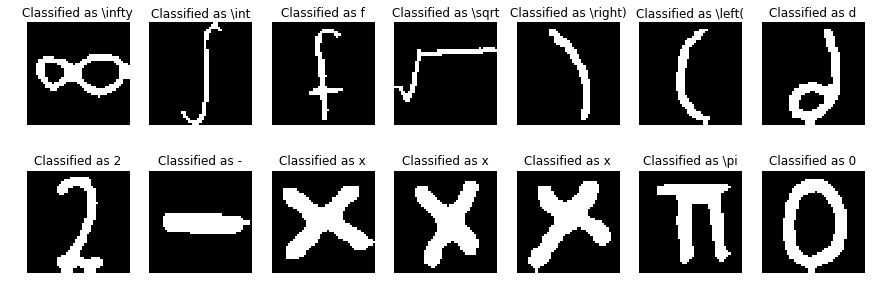

In [18]:
def classify(components, classifier):
    """
    Classifies each component image using a classifier. Stores result in components dictionary.
    
    :param components: a dictionary of components mapping labels to attributes
    :param classifier: tensorflow classifier
    """
    test = np.asarray([components[i]['pic'] for i in sorted(components.keys())]).astype(np.float32)
    predict_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": test},
        y=None,
        batch_size=1,
        num_epochs=1,
        shuffle=False,
        num_threads=1)
    predict_results = classifier.predict(predict_input_fn) 

    fig, axes = plt.subplots(2, int((len(components) + 1)/2), figsize=(15, 5))

    for i, (d, ax) in enumerate(zip(predict_results, axes.ravel())):
        components[i + 1]['label'] = d['classes']
        components[i + 1]['output'] = key[d['classes']]

        ax.imshow(components[i + 1]['pic'].reshape(45, 45), cmap='gray')
        ax.axis('off')
        ax.set_title('Classified as ' + key[d['classes']])
    plt.show()
classify(components, classifier)

In [19]:
def assign_group(components, offset_threshold=3):
    """
    Assigns the components to a group by height.
    
    :param components: a dictionary of components mapping labels to attributes
    :param offset_threshold: the minimum offset of each group
    :return: components dictionary and the unique groups
    """
    heights = [[components[i]['tl'][0], components[i]['br'][0]] for i in components]
    groups = [heights[0]]
    for height in heights[1:]:
        if height[0] + offset_threshold < groups[-1][1]:
            groups[-1][1] = max(height[1], groups[-1][1])
        else:
            groups.append(height)
    for i in components:
        for group in groups:
            if group[0] < components[i]['tl'][0] + offset_threshold < group[1]: 
                components[i]['group'] = group
    return components, groups
components, groups = assign_group(components)

In [20]:
# Subscript and superscript detection
def detect_script(components, groups):
    """
    Detects superscripts and subscripts based on group.
    
    :param components: a dictionary of components mapping labels to attributes
    :param groups: the list of unique groups
    :return: the components with subscripts/superscripts identified
    """
    for g in groups:
        bottoms = [components[i]['br'][0] for i in sorted(components.keys()) if components[i]['group'] == g]
        tops = [components[i]['tl'][0] for i in sorted(components.keys()) if components[i]['group'] == g]
        bottoms_mean = np.mean(bottoms)
        bottoms_std = np.std(bottoms)
        tops_mean = np.mean(tops)
        tops_std = np.std(tops)

        if len(bottoms) == 1: continue
        for i in components:
            if components[i]['group'] == g:
                s = (bottoms_mean - components[i]['br'][0])/bottoms_std - (components[i]['tl'][0] - tops_mean)/tops_std

                if s > 2.5:
                    components[i]['sup'] = True
                elif s < -2.5:
                    components[i]['sub'] = True
    return components
detect_script(components, groups)

{1: {'br': (843, 1367),
  'group': [718, 1506],
  'label': 33,
  'output': '\\infty',
  'pic': array([0., 0., 0., ..., 0., 0., 0.]),
  'sub': False,
  'sup': True,
  'tl': (718, 1132)},
 2: {'br': (1430, 1086),
  'group': [718, 1506],
  'label': 34,
  'output': '\\int',
  'pic': array([0., 0., 0., ..., 0., 0., 0.]),
  'sub': False,
  'sup': False,
  'tl': (725, 789)},
 3: {'br': (1319, 2417),
  'group': [718, 1506],
  'label': 24,
  'output': 'f',
  'pic': array([0., 0., 0., ..., 0., 0., 0.]),
  'sub': False,
  'sup': False,
  'tl': (961, 2277)},
 4: {'br': (1345, 2137),
  'group': [718, 1506],
  'label': 54,
  'output': '\\sqrt',
  'pic': array([0., 0., 0., ..., 0., 0., 0.]),
  'sub': False,
  'sup': False,
  'tl': (979, 1482)},
 5: {'br': (1287, 2948),
  'group': [718, 1506],
  'label': 1,
  'output': '\\right)',
  'pic': array([0., 0., 0., ..., 0., 0., 0.]),
  'sub': False,
  'sup': False,
  'tl': (1012, 2808)},
 6: {'br': (1320, 2596),
  'group': [718, 1506],
  'label': 0,
  'outpu

In [21]:
def construct_latex(components, groups):
    """
    Constructs the combined latex representation of the components.

    :param components: a dictionary of components mapping labels to attributes
    :param groups: the list of unique groups
    :return: the latex expression
    """
    lr_order = sorted(components.keys(), key=lambda x: components[x]['tl'][1])
    vsep = {tuple(group):[] for group in groups}
    MODE_SUP = set()
    MODE_SUB = set()
    MODE_SQRT = {}

    for l in lr_order:
        t, left = components[l]['tl']
        b, right = components[l]['br']
        for g in vsep:
            if g[0] <= t <= b <= g[1]:

                if g in MODE_SQRT and left > MODE_SQRT[g]:
                    vsep[g].append('}')
                    del MODE_SQRT[g]

                if g in MODE_SUP and not components[l]['sup']:
                    vsep[g].append('}')
                    MODE_SUP.remove(g)
                if g in MODE_SUB and not components[l]['sub']:
                    vsep[g].append('}')
                    MODE_SUB.remove(g)

                if g not in MODE_SUP and components[l]['sup']:
                    vsep[g].append('^{')
                    MODE_SUP.add(g)
                if g not in MODE_SUB and components[l]['sub']:
                    vsep[g].append('_{')
                    MODE_SUB.add(g)

                vsep[g].append(components[l]['output'] + ' ')
                if components[l]['output'] == '\\sqrt':
                    MODE_SQRT[g] = right
                    vsep[g].append('{')

                break

    for i in MODE_SQRT:
        vsep[g].append('}')
    for g in vsep:
        vsep[g] = ''.join(vsep[g])

    # FRACTION PROCESSING (for now just 3 layers)
    if len(vsep) == 3:
        first_g, _, last_g = list(sorted([g for g in vsep], key = lambda g: g[0]))
        final = '\\frac{' + vsep[first_g] + '}{' + vsep[last_g] + '}'
    else:
        final = list(vsep.values())[0]
    final = '$' + final + '$'
    return final
expression = construct_latex(components, groups)
expression

'$\\int _{0 }^{\\infty }- \\sqrt {2 \\pi x }f \\left( x \\right) d x $'

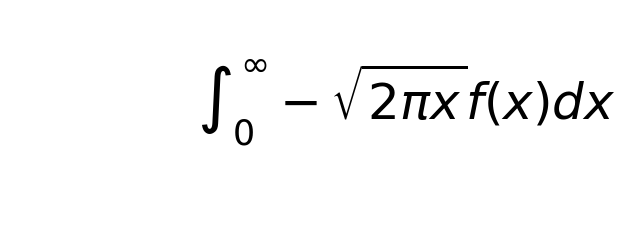

In [22]:
fig, ax = plt.subplots()
ax.text(0.5, 0.5, expression, size=50)
ax.axis('off')
plt.show()

# Concluding Remarks

The model only works well on a very specific subset of possible images. The largest problem in this project is the image preprocessing; it was difficult to process the image so that it would match the dataset we had. The second largest problem was our way of segmenting the components and synthesizing them. Our algorithm works on only simple expressions. Lastly, the classification model itself performed well on the dataset and had low test error. However, the poor image preprocessing for real images resulted in poor results from the CNN.

### Test Image Preprocessing

As can be seen, the test image, or the image that is taken by the camera, is processed before being sent to the CNN. This is to ensure that all noise in the form of uneven lighting, folded paper, eraser markings, and more are as thoroughly removed as possible. These images have been taken from the middle of our preprocessing process. Each image has been thresholded and inverted so that the core changes can be seen at each step. Finally, each component is identified.

In reality, this isn't a great way to do the preprocessing as the parameters for the morphological operators (opening, closing, dilation) and the blurs (Gaussian blurs, median blurs) were empirically determined. The essential segmentation required is one of background and foreground where the background is the writing surface while the foreground are the pen strokes. To improve towards this goals, one improvement could be to combine histogram techniques with the morphological operators and blurs. A histogram of the image's colors could be manipulated to increase contrast, and then the current morphological operators/blurs could be used on this altered image. 

### Classification Model

Although the CNN does very well on the validation set, classification on real test images such as the equations seen above becomes much more difficult for the model, mostly because of the difficulty in processing the real images so that they match the data. There are two primary ways to amend this issue:
* Better preprocessing and training data processing, which is addressed above
* More variety of data

### Symbol Positioning and Grouping

The process of separating the components and synthesizing them limited the range of the different types of equations this could recognize. Firstly, to separate the different symbols, we use the "connected components", which only extracts groups of pixels that are connected. This means that something like $=, \le, \ge$ signs would be recognized as two different components. Additionally, functions such as $\sin$ would also be separated. This makes it more difficult to render, as we have to take into account the locations of sub-components to form a component.

To recognize fractions, we divide the image into disjoint vertical segments, which ideally ends up in a numerator, fraction bar, and a denominator. If there is overlap between the fraction bar and either the numerator or denominator, this would not work. Furthermore, if we have a fraction within a larger operator, such as $\int \frac1x\ dx$, our algorithm would not be able to recognize the fraction bar because of the integral spanning the entire group. A possible way to fix this would be to recursively process expressions within large operators such as an integral or partenthese. 

Because we recognize fractions in this way, a superscript that does not vertically overlap with any other components will be its own separate group, which is obviously erroneous. 

To recognize subscripts and superscripts, we normalized the positioning of each vertical position and compared how many standard deviations a certain component was from the mean of the bottom of the images (for superscripts) or the mean of the top of the images (for subscripts). We utilized both of these standard deviations to distinguish a superscript from a subscript.